<a href="https://colab.research.google.com/github/kokejohh/PMU_Module_3/blob/main/PMU_B_MLModels_Cls_%26_Reg_(Practices).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Analysis and Linear Classification
จัดทำโดย จิรายุ เพชรแหน ภาควิชาวิศวกรรมคอมพิวเตอร์ คณะวิศวกรรมศาสตร์ สถาบันเทคโนโลยีพระจอมเกล้าเจ้าคุณทหารลาดกระบัง

----

## Student: Pitchakorn Thiprangsi

---
### 1. Sample data (random)

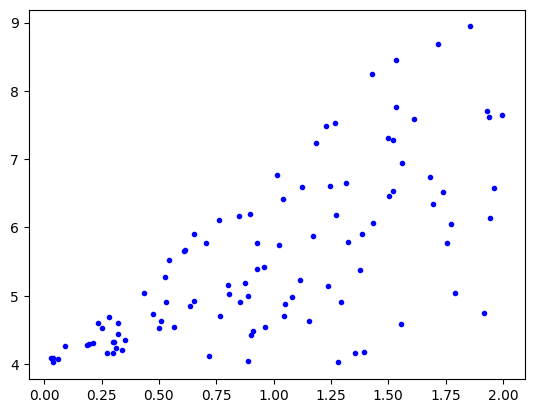

In [66]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X * np.random.rand(100, 1)

import matplotlib.pyplot as plt
plt.plot(X, y, 'b.')
plt.show()

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

0.5193300564542562
[[1.44490577]] [4.04048455]
0.556174988623856
[1.91009491] [3.52014191]


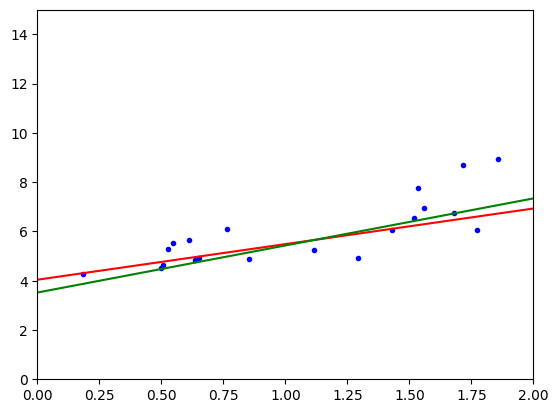

In [128]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(lin_reg.score(X_test, y_test))
print(lin_reg.coef_, lin_reg.intercept_)

X_plot = np.array([[0], [2]])
y_plot = lin_reg.predict(X_plot)

plt.plot(X_test, y_test, 'b.')
plt.plot(X_plot, y_plot, 'r-')
plt.axis([0, 2, 0, 15])

from sklearn.linear_model import SGDRegressor

lin_sgd = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.001, random_state=42)
lin_sgd.fit(X_train, y_train.ravel())
print(lin_sgd.score(X_test, y_test))
print(lin_sgd.coef_, lin_sgd.intercept_)

y_plot = lin_sgd.predict(X_plot)
plt.plot(X_plot, y_plot, 'g-')
plt.show()

---
### 2. Sample Data (hours, gpa)

In [136]:
import numpy as np

hours = np.array([0, 1, 1, 5, 9, 9, 10, 11, 12, 12])
gpa = np.array([0, 0, 0, 2, 3, 3, 3, 4, 4, 4])

from sklearn.preprocessing import PolynomialFeatures

hours, gpa = hours.reshape(-1, 1), gpa.reshape(-1, 1)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
hours_poly_p2 = poly_features.fit_transform(hours)
hours[-1], hours_poly_p2[-1]

(array([12]), array([ 12., 144.]))

In [137]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(hours, gpa)
print(lin_reg.intercept_, lin_reg.coef_)

[-0.15673077] [[0.35096154]]


[-0.21387164] [[ 0.40022365 -0.00412169]]


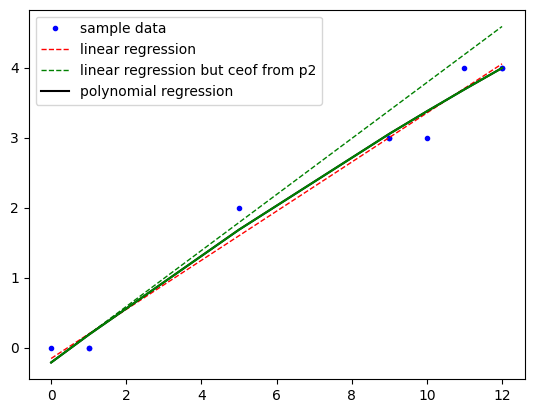

In [138]:
from sklearn.linear_model import LinearRegression

lin_reg_p2 = LinearRegression()
lin_reg_p2.fit(hours_poly_p2, gpa)
y_p2_predict = lin_reg_p2.predict(hours_poly_p2)
print(lin_reg_p2.intercept_, lin_reg_p2.coef_)

y_linear = lin_reg.coef_* hours + lin_reg.intercept_
y_p2_linear = lin_reg_p2.coef_[0][0] * hours + lin_reg_p2.intercept_
y_p2_sci = lin_reg_p2.coef_[0][1] * (hours ** 2) + lin_reg_p2.coef_[0][0] * hours + lin_reg_p2.intercept_

plt.plot(hours, gpa, 'b.', label='sample data')
plt.plot(hours, y_linear, 'r--', label='linear regression', linewidth=1)
plt.plot(hours, y_p2_linear, 'g--', label='linear regression but ceof from p2', linewidth=1)
plt.plot(hours, y_p2_sci, 'k-', label='polynomial regression')
plt.plot(hours, y_p2_predict, 'g-')
plt.legend()

### 3. Sample Data (iris)

In [143]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data']
y = (iris['target'] == 2).astype(int)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_predict = log_reg.predict(X_test)
print(log_reg.score(X_test, y_test))
log_reg.predict_proba(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))

1.0
1.0


### 50 Startup

#### Data 50 Startup

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

!pip install opendatasets
import opendatasets as od

od.download('https://www.kaggle.com/datasets/farhanmd29/50-startups')

df = pd.read_csv('./50-startups/50_Startups.csv')
df.head()

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pitchakornkoke
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/farhanmd29/50-startups


100%|██████████| 1.30k/1.30k [00:00<00:00, 4.68MB/s]

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [147]:
df_num = df.drop('State', axis=1)
X = df_num.drop('Profit', axis=1)
y = df_num['Profit']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(lin_reg.coef_, lin_reg.intercept_)
print(lin_reg.score(X_test, y_test))

y_prediction = lin_reg.predict(X_test)
X_test['Predict_Profit'] = y_prediction
X_test

[ 0.80377928 -0.06792917  0.03124155] 54071.87574599082
0.9000653083037321


,R&D Spend,Administration,Marketing Spend,Predict_Profit
13,91992.39,135495.07,252664.93,126703.027165
39,38558.51,82982.09,174999.30,84894.750816
30,61994.48,115641.28,91131.24,98893.418160
45,1000.23,124153.04,1903.93,46501.708150
17,94657.16,145077.58,282574.31,129128.397344
48,542.05,51743.15,0.00,50992.694863
26,75328.87,144135.98,134050.07,109016.553658
25,64664.71,139553.16,137962.62,100878.464145
32,63408.86,129219.61,46085.25,97700.596386
19,86419.70,153514.11,0.00,113106.152922


---
#### Single variable, e.g., Marketing Spend to Profit

In [161]:
X = df[['Marketing Spend']]
y = df['Profit']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_prediction = lin_reg.predict(X_test)
print(lin_reg.score(X_test, y_test))
#y_prediction

df.drop('State', axis=1).corr().style.background_gradient()

-0.11205578997827947


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [160]:
lin_reg.coef_, lin_reg.intercept_ # Take a look at the parameters learnt

(array([0.28305083]), np.float64(48923.31296724075))

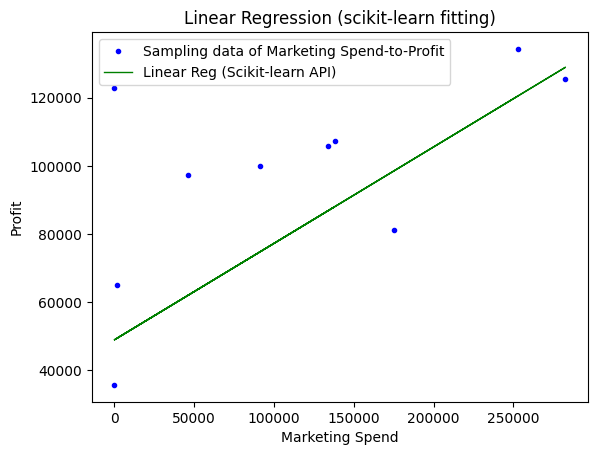

In [ ]:
plt.plot(X_test, y_test, 'b.', label='Sampling data of Marketing Spend-to-Profit')

# plt.plot(X_test, y_test, "r-", label='True expression', linewidth=0.5)
plt.plot(X_test, y_prediction, "g-", label='Linear Reg (Scikit-learn API)', linewidth=1)
plt.title('Linear Regression (scikit-learn fitting)')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.legend()
plt.show()

In [ ]:
# mse loss
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_test, y_prediction)
lin_mse

900533964.2328259

In [ ]:
# mae loss
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, y_prediction)
lin_mae

23639.881154096685

In [162]:
# rmse loss
from sklearn.metrics import mean_squared_error
import numpy as np

lin_mse = mean_squared_error(y_test, y_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(30008.898084282035)

In [165]:
from sklearn.metrics import r2_score
r2_multi_var = r2_score(y_test, y_prediction)
print(f"R-squared for Multi-Variable Model: {r2_multi_var}")

R-squared for Multi-Variable Model: -0.11205578997827947


----
### Correlation analysis and try to use R&D Spend as single and only variable

In [ ]:
# Add correlation analysis
df_nonstate = df.drop('State', axis=1)
correlation_matrix = df_nonstate.corr().style.background_gradient()
display(correlation_matrix)

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [ ]:
X = df[['R&D Spend']]
y = df['Profit']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

X_test = X_test.sort_values('R&D Spend')

y_prediction = lin_reg.predict(X_test)

In [ ]:
lin_reg.coef_, lin_reg.intercept_

(array([0.8516228]), np.float64(48416.297661385026))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_p2 = poly_features.fit_transform(X_train)
poly_p2_test = poly_features.transform(X_test)
y_test = y_test.reindex(X_test.index)

from sklearn.linear_model import LinearRegression
lin_p2 = LinearRegression()
lin_p2.fit(poly_p2, y_train)
lin_p2_predict = lin_p2.predict(poly_p2_test)
lin_p2.coef_, lin_p2.intercept_
print(lin_p2.score(poly_p2_test, y_test))

0.9421158676496727


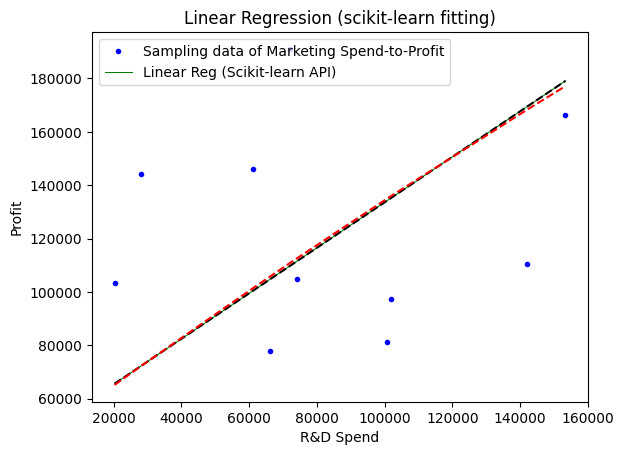

In [ ]:
plt.plot(X_test, y_test, "b.", label='Sampling data of Marketing Spend-to-Profit')
# plt.plot(X_test, y_test, "r-.", label='True expression', linewidth=0.5)
y_hat_linear = lin_reg.coef_[0]*X_test + lin_reg.intercept_
plt.plot(X_test, y_hat_linear, "g-", label='Linear Reg (Scikit-learn API)', linewidth=0.75)
plt.plot(X_test, y_prediction, 'k--')
plt.plot(X_test, lin_p2_predict, 'r--')
plt.title('Linear Regression (scikit-learn fitting)')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.legend()
plt.show()

In [ ]:
# rmse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(7714.334890830185)

In [ ]:
from sklearn.metrics import r2_score
r2_multi_var = r2_score(y_test, y_predictions)
print(f"R-squared for Multi-Variable Model: {r2_multi_var}")

R-squared for Multi-Variable Model: 0.9265108109341951


---
#### Multiple Variable, e.g., all features [R&D Spend, ..., Marketing Spend]



In [ ]:
df_num = df.drop('State', axis=1)
X = df_num.drop('Profit',axis=1)
y = df_num['Profit']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

y_predictions = lin_reg.predict(X_test)
y_predictions

array([126703.02716461,  84894.75081556,  98893.41815974,  46501.70815036,
       129128.39734381,  50992.69486261, 109016.5536578 , 100878.4641454 ,
        97700.59638629, 113106.15292226])

In [ ]:
# mse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_predictions)
lin_mse

80926321.22295158

In [ ]:
# mae loss
from sklearn.metrics import mean_absolute_error
import numpy as np
lin_mae = mean_absolute_error(y_test, y_predictions)
lin_mae

6979.152252370402

In [ ]:
# rmse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(8995.905803361415)

In [ ]:
from sklearn.metrics import r2_score
r2_multi_var = r2_score(y_test, y_predictions)
print(f"R-squared for Multi-Variable Model: {r2_multi_var}")

R-squared for Multi-Variable Model: 0.9000653083037321


---
### Polynomial (Single-var)

In [ ]:
X = df[['R&D Spend']]
y = df['Profit']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

X_test_sort = X_test.sort_values('R&D Spend')
X_test_poly = poly_features.transform(X_test_sort)
y_prediction = lin_reg.predict(X_test_poly)
y_test_sort = y_test.reindex(X_test_sort.index)

lin_reg.score(X_test_poly, y_test_sort)

0.9421158676496727

In [ ]:
lin_reg.intercept_, lin_reg.coef_

(np.float64(46630.65252937072), array([ 9.27508819e-01, -5.02481042e-07]))

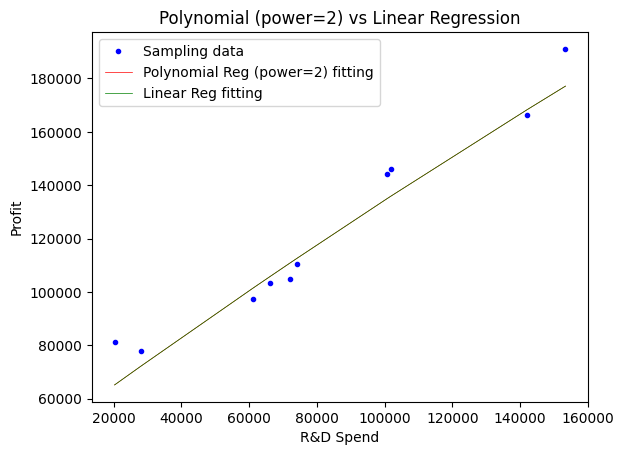

In [ ]:
# Plot the data
plt.plot(X_test, y_test, "b.", label='Sampling data')

# Plot the polynomial regression curve
y_hat_poly2 = lin_reg.coef_[0]*X_test_sort + lin_reg.coef_[1]*(X_test_sort**2) + lin_reg.intercept_
plt.plot(X_test_sort, y_hat_poly2, "r-", label='Polynomial Reg (power=2) fitting', linewidth=0.5)

# Plot the simple linear regression line
plt.plot(X_test_sort, y_prediction, "g-", label='Linear Reg fitting', linewidth=0.5)

plt.title('Polynomial (power=2) vs Linear Regression')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.legend()
# plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
# mse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_prediction)
lin_mse

68473440.71905932

In [ ]:
# mae loss
from sklearn.metrics import mean_absolute_error
import numpy as np
lin_mae = mean_absolute_error(y_test, y_prediction)
lin_mae

6772.453280477899

In [ ]:
# rmse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(8274.86801822599)

In [ ]:
from sklearn.metrics import r2_score
r2_multi_var = r2_score(y_test, y_prediction)
print(f"R-squared for Multi-Variable Model: {r2_multi_var}")

R-squared for Multi-Variable Model: 0.9464587607787219


### 3rd degree

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_test_sorted = X_test.sort_values('R&D Spend')
y_test_sorted = y_test.reindex(X_test_sorted.index)

poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

X_test_poly = poly_features.transform(X_test_sorted)
y_prediction = lin_reg.predict(X_test_poly)
lin_reg.score(X_test_poly, y_test_sorted)

0.9377905102765763

In [ ]:
lin_reg.intercept_, lin_reg.coef_

(np.float64(41731.41169989048),
 array([ 1.48117131e+00, -9.97924039e-06,  4.04557775e-11]))

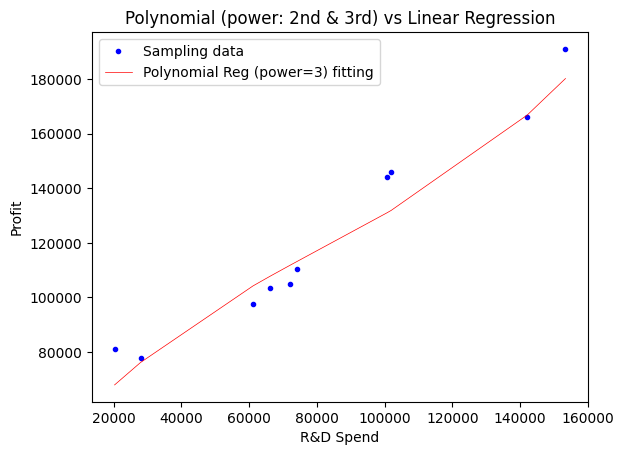

In [ ]:
# Plot the data
plt.plot(X_test, y_test, "b.", label='Sampling data')

# Plot the polynomial regression curve (deg=3)
plt.plot(X_test_sorted, y_prediction, "r-", label='Polynomial Reg (power=3) fitting', linewidth=0.5)

plt.title('Polynomial (power: 2nd & 3rd) vs Linear Regression')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.legend()
# plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
# mse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test_sorted, y_prediction)
lin_mse

79559193.41229811

In [ ]:
# mae loss
from sklearn.metrics import mean_absolute_error
import numpy as np
lin_mae = mean_absolute_error(y_test_sorted, y_prediction)
lin_mae

7459.996395530934

In [ ]:
# rmse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test_sorted, y_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(8919.59603414292)

In [ ]:
from sklearn.metrics import r2_score
r2_multi_var = r2_score(y_test_sorted, y_prediction)
print(f"R-squared for Multi-Variable Model: {r2_multi_var}")

R-squared for Multi-Variable Model: 0.9377905102765763


---
### Polynomial (Multi-var)

In [ ]:
df_num = df.drop('State', axis=1)
X = df_num.drop('Profit',axis=1)
y = df_num['Profit']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly_features.fit_transform(x_train)
lin_reg = LinearRegression()
lin_reg.fit(x_train_poly,y_train)

x_test_poly = poly_features.fit_transform(x_test)
y_predictions = lin_reg.predict(x_test_poly)
y_predictions

array([127847.00518864,  85112.32235097,  95568.69250711,  42469.57103414,
       130233.04602766,  40156.96833478, 109698.73111041, 101570.72550455,
        93458.11976512, 108223.28785227])

In [ ]:
# mse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_predictions)
lin_mse

90304882.2778587

In [ ]:
# mae loss
from sklearn.metrics import mean_absolute_error
import numpy as np
lin_mae = mean_absolute_error(y_test, y_predictions)
lin_mae

7506.0645971984

In [ ]:
# rmse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(9502.888101932944)

In [ ]:
from sklearn.metrics import r2_score
r2_multi_var = r2_score(y_test, y_predictions)
print(f"R-squared for Multi-Variable Model: {r2_multi_var}")

R-squared for Multi-Variable Model: 0.8884838649190184


----
### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create the binary target variable
df['Profit_Class'] = (df['Profit'] > 150000).astype(int)

# Select features and target
# Using the numerical features from the previous multiple variable example
df_num = df.drop('State', axis=1)
X = df_num.drop(['Profit', 'Profit_Class'], axis=1)
y = df_num['Profit_Class']

In [ ]:
y

,Profit_Class
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,0


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.92
Confusion Matrix:
[[20  1]
 [ 1  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.75      0.75      0.75         4

    accuracy                           0.92        25
   macro avg       0.85      0.85      0.85        25
weighted avg       0.92      0.92      0.92        25



----
### ฝึกฝนด้วยตัวเอง

ชุดข้อมูลประเมินคุณภาพไวน์ (Wine quality) จากข้อมูลคุณลักษณะที่มี (feature attributes) ได้แบ่งการประเมินเป็นคะแนนคุณภาพ "Quality" column
1. ต้องการสร้างโมเดลทำนายคะแนนคุณภาพไวน์ (Hint: การวิเคราะห์การถดถอยเชิงเส้น)

2. โมเดลคัดแบตซ์ไวน์มีคุณภาพไม่ ให้เกณฑ์การคัดแยกอยุ่ที่ 6 คะแนน (> 6 คะแนน เท่ากับไวน์ดี มิฉะนั้น <= 6 คะแนน เท่ากับไวน์คุณภาพแย่) (Hint: การจำแนกประเภท)

```python
import kagglehub
import pandas as pd

path = kagglehub.dataset_download("piyushgoyal443/red-wine-dataset")

print(os.listdir(path)) # choose "['wineQualityReds.csv']"

csv_path = os.path.join(path, 'wineQualityReds.csv')
df = pd.read_csv(csv_path)
```

In [1]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download('piyushgoyal443/red-wine-dataset')

print(os.listdir(path))

csv_path = os.path.join(path, 'wineQualityReds.csv')
df = pd.read_csv(csv_path)
df.drop('Unnamed: 0', axis=1,  inplace=True)
df.head()

100%|██████████| 29.4k/29.4k [00:00<00:00, 13.6MB/s]

Extracting files...
['wineQualityReds.csv', 'wineQualityInfo.txt']


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
df.corr().style.background_gradient()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile.acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric.acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual.sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free.sulfur.dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total.sulfur.dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [3]:
from sklearn.model_selection import train_test_split
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)
y_prediction = lin_reg.predict(X_test_poly)

from sklearn.metrics import r2_score
print(r2_score(y_test, y_prediction))

0.4156800640935101


In [25]:
from sklearn.model_selection import train_test_split

quality_class = (df['quality'] > 6).astype(int)

X = df.drop('quality', axis=1)
y = quality_class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)
y_prediction = log_reg.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test, y_prediction))
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

0.803125
[[216  57]
 [  6  41]]
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       273
           1       0.42      0.87      0.57        47

    accuracy                           0.80       320
   macro avg       0.70      0.83      0.72       320
weighted avg       0.89      0.80      0.83       320

